# Classification 
![alt text](https://uploads.toptal.io/blog/image/330/toptal-blog-image-1395721394410.png)


![alt text](http://ipython-books.github.io/images/ml.png)
## What is Logistic regression?

Logistic regression is named for the function used at the core of the method, the logistic function. In linear regression, the outcome (dependent variable) is continuous. It can have any one of an infinite number of possible values. In logistic regression, the outcome (dependent variable) has only a limited number of possible values. Logistic Regression is used when response variable is categorical in nature.

The logistic function, also called the sigmoid function is an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

![alt text](https://qph.ec.quoracdn.net/main-qimg-05edc1873d0103e36064862a45566dba "Logo Title Text 1")

Where e is the base of the natural logarithms (Euler’s number or the EXP() function in your spreadsheet) and value is the actual numerical value that you want to transform. E is a really convenient number for math, for example Whenever you take the derivative of e^x (that's e to the x), you get e^x back again.  It's the only function on Earth that will do that.

Logistic regression uses an equation as the representation, similar to linear regression. The central premise of Logistic Regression is the assumption that your input space can be separated into two nice ‘regions’, one for each class, by a linear(read: straight) boundary. Your data must be linearly seperable in n dimensions

![alt text](https://codesachin.files.wordpress.com/2015/08/linearly_separable_4.png "Logo Title Text 1")

So if we had the following function

![alt text](https://s0.wp.com/latex.php?latex=%5Cbeta_0+%2B+%5Cbeta_1+x_1+%2B+%5Cbeta_2+x_2&bg=ffffff&fg=555555&s=0&zoom=2 "Logo Title Text 1")

Given some point (a,b), if we plugged it in, the equation could output a positive result (for one class), negative result (for the other class), or 0 (the point lies right on the decision boundary).

So  we have a function that outputs a value in (-infinity, +infinity) given an input data point. But how do we map this to the probability P_+, that goes from [0, 1]? The answer, is in the odds function.

![alt text](http://i.imgur.com/bz8XqI8.png "Logo Title Text 1")

Let $P(X)$ denote the probability of an event X occurring. In that case, the odds ratio (OR(X)) is defined by 

![alt text](https://s0.wp.com/latex.php?latex=%5Cfrac%7BP%28X%29%7D%7B1-P%28X%29%7D&bg=ffffff&fg=555555&s=0&zoom=2 "Logo Title Text 1")

which is essentially the ratio of the probability of the event happening, vs. it not happening. It is clear that probability and odds convey the exact same information. But as $P(X)$ goes from 0 to 1, OR(X) goes from 0 to infinity

Input values (x) are combined linearly using weights or coefficient values (referred to as the Greek capital letter Beta) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) (discrete) rather than a numeric value (continuous)

![alt text](https://image.slidesharecdn.com/ihcclogisticregression-130728061733-phpapp02/95/logistic-regression-in-casecontrol-study-14-638.jpg?cb=1374992365 "Logo Title Text 1")

However, we are still not quite there yet, since our boundary function gives a value from –infinity to infinity. So what we do, is take the logarithm of OR(X), called the log-odds function. Mathematically, as OR(X) goes from 0 to infinity, log(OR(X)) goes from –infinity to infinity

We are modeling the probability that an input (X) belongs to the default class (Y=1). The probability prediction must be transformed into a binary values (0 or 1) in order to actually make a probability prediction. Logistic regression is a linear method, but the predictions are transformed using the logistic function. The impact of this is that we can no longer understand the predictions as a linear combination of the inputs as we can with linear regression.

Wait, how is the boundary function computed? Well we want to maximize the likelihood that a random data point gets classified correctly. We call this Maximimum likelihood estimation.

Maximum likelihood estimation is a general approach to estimating parameters in statistical models by maximizing the likelihood function. MLE applied to deep networks gets a special name “Backpropagation". MLE is defined as

L(θ|X)=f(X|θ)

In this notebook we will implement logistic regression from scratch. Follow the steps below. 

In [1]:
#import libraries 
# Scientific computation
import numpy as np 
# Visualization
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot')
# Unit tests
#from unit_tests import *

In [2]:
# Configure visualization retina display for jupyter notebook
%config InlineBackend.figure_format = 'retina'

### Activation functions
There are several activation functions that can be used for classification

#### Sigmoid
**Exercise: **Complete the sigmoid function below, check your answer with the plot in the next cell. 
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

In [8]:
# Formula:
# g(x) = 1 / (1 + np.exp(-x))

# Generator way 
sigmoid_gen = lambda x: (1+np.exp(-x))**-1

print(sigmoid_gen(0))

# Function way
def sigmoid(x, deriv = False):
    '''
    Sigmoid function
    :param x: tensor that contains the input values 
    :param deriv: boolean that controls the return of the derivative of the sigmoid
    : return: a tensor that has processed a sigmoid activation function and if true return the derivative 
                of the sigmoid
    '''
    sig = 1 / (1 + np.exp(-x))
    if deriv:
        sig_deriv = sig*(1-sig) 
        return sig_deriv
    else:
        return sig

#print(sigmoid(4.6), sigmoid(-4.6), sigmoid(1000))

0.5


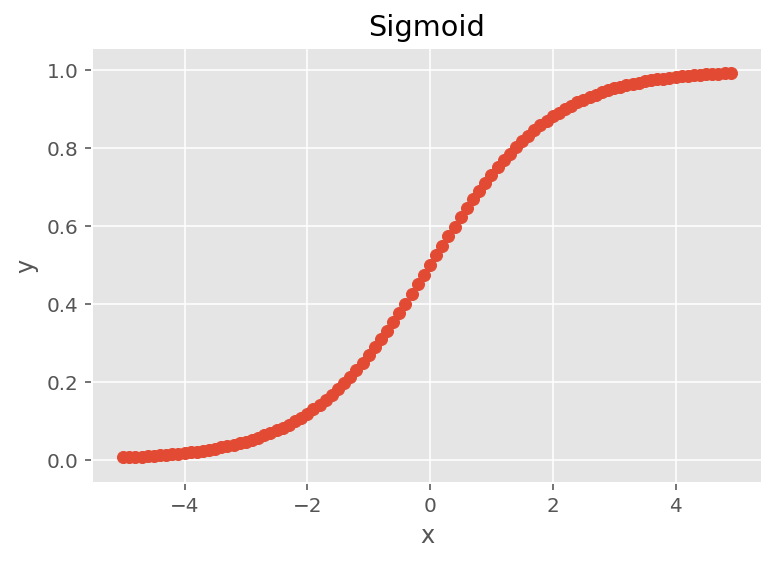

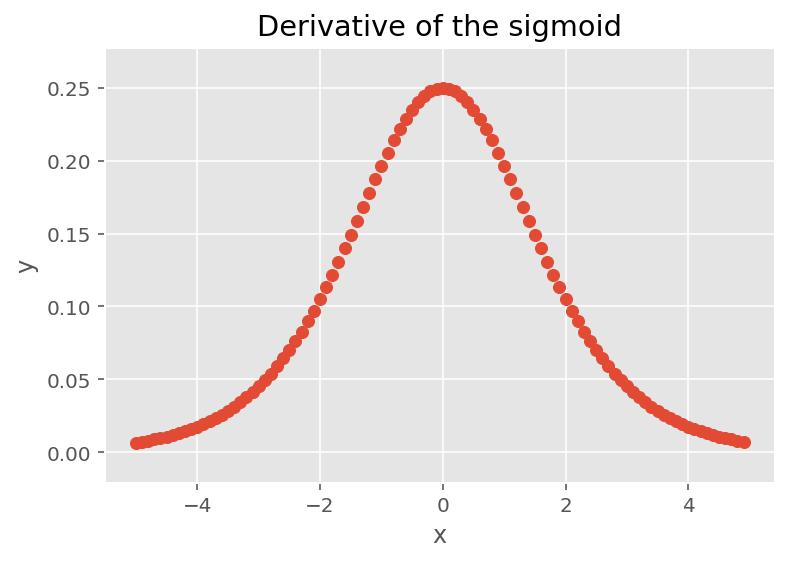

In [7]:
# Generate data points
x = np.arange(-5,5,0.1)
y = sigmoid(x)
y_deriv = sigmoid(x, deriv = True)

# Plot the sigmoid
#plt.subplot(2,1,1)
plt.scatter(x, y)
plt.title('Sigmoid')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plot the derivative of the sigmoid
#plt.subplot(2,1,2)
plt.scatter(x, y_deriv)
plt.title('Derivative of the sigmoid')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

#### Hyperbolic tangent (tanh)
**Exercise: **Complete the tanh function below, check your answer with the plot of the next cell.  
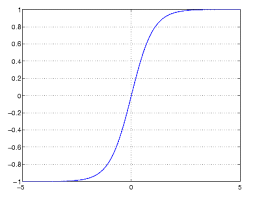

In [9]:
# tanh
# f(x) = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

# Generator
tanh_gen = lambda x: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

# Function
def tanh(x):
    '''
    Hyperbolic tangent function
    :param x: tensor that contains the input values 
    : return: a tensor that has processed a tanh activation function and if true return the derivative 
                of tanh
    '''
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

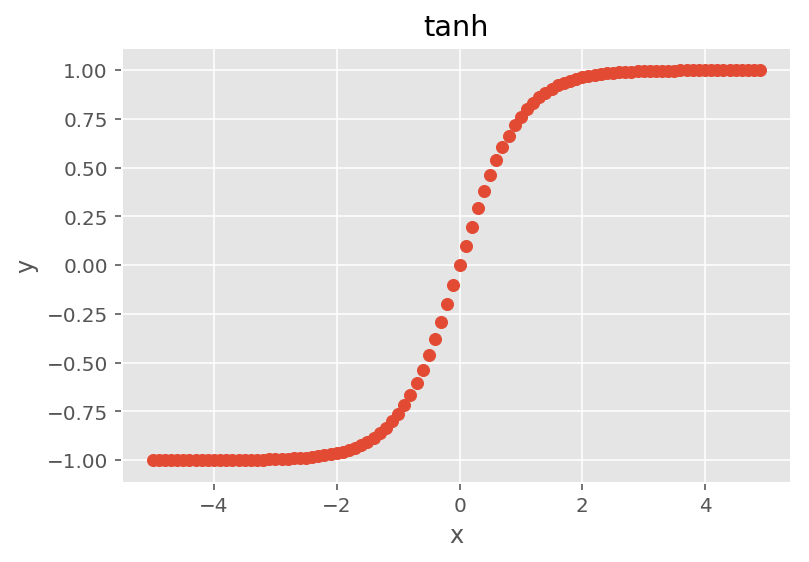

In [10]:
# Create data points
x = np.arange(-5,5,0.1)
y = tanh(x) 

plt.scatter(x,y)
plt.title('tanh')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Relu (rectifier linear unit)
**Exercise: **Complete the relu function below, check your answer with the plot of the next cell.  
![alt text](https://i.stack.imgur.com/8CGlM.png)

In [17]:
# Generator 
relu_gen = lambda x: x if x > 0 else 0

# Function
def relu(x, deriv = False):
    '''
    Rectified linear unit function
    :param x: tensor that contains the input values 
    :param deriv: boolean that controls the return of the derivative of the relu
    : return: a tensor that has processed a relu activation function and if true
                return the derivative of the relu
    '''
    if deriv == True:
        x_relu = []
        for each in x:
            if each <= 0:
                x_relu.append(0)
            else:
                x_relu.append(1)
        return x_relu #np.ones_like(x)
    else:            
        return np.maximum(0, x) 


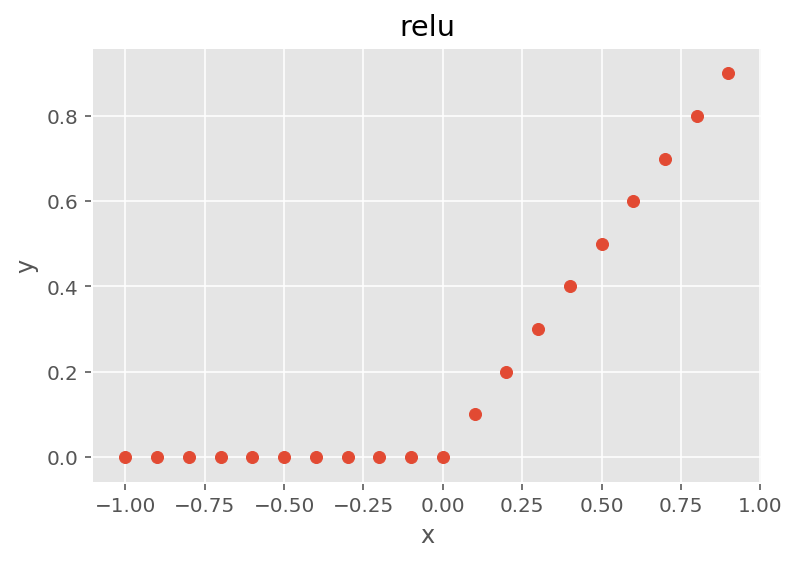

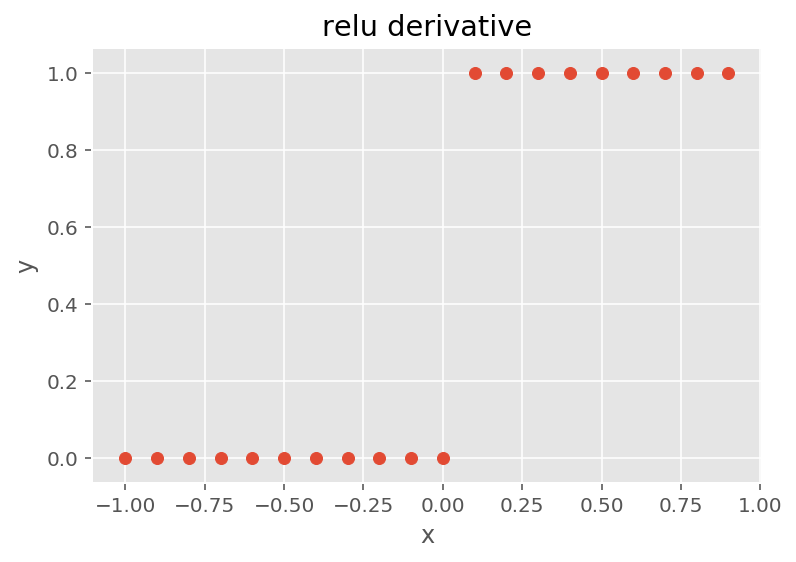

In [18]:
# Generate data points for relu
x = np.arange(-1,1,0.1)
y = relu(x, deriv = False)

# Generate data points for relu derivative
y_deriv = relu(x, deriv = True)

# Plot the data
plt.scatter(x, y)
plt.title('relu')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(x, y_deriv)
plt.title('relu derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Leaky Relu
**Exercise: **Complete the leaky relu function below, check your answer with the plot of the next cell.
![alt text](https://linzhouhan.files.wordpress.com/2015/04/prelu.png)

In [19]:
# Hyperparamter
alpha = 0.9 # Smoothing hyperparameter

In [20]:
# Generator 
#lrelu_gen = 

# Function
def lrelu(x, deriv = False):
    '''
    Leaky relu function
    :param x: tensor that contains the input values 
    :param deriv: boolean that controls the return of the derivative of the leaky relu
    : return: a tensor that has processed a leaky relu activation function and if 
                true return the derivative of the leaky relu
    '''
    if deriv == True:
        x_relu = []
        for each in x:
            if each <= 0:
                x_relu.append(0)
            else:
                x_relu.append(alpha)
        return x_relu #np.ones_like(x)
    else:            
        return np.maximum(alpha, alpha*x) 

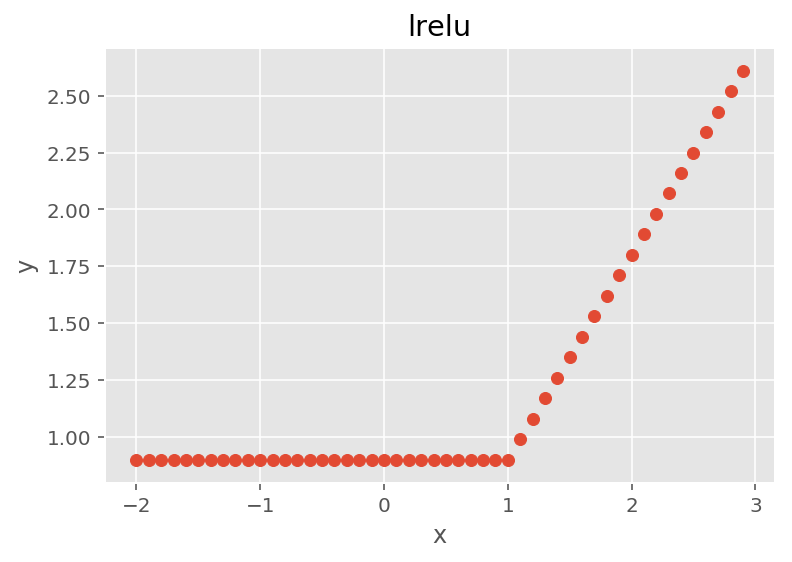

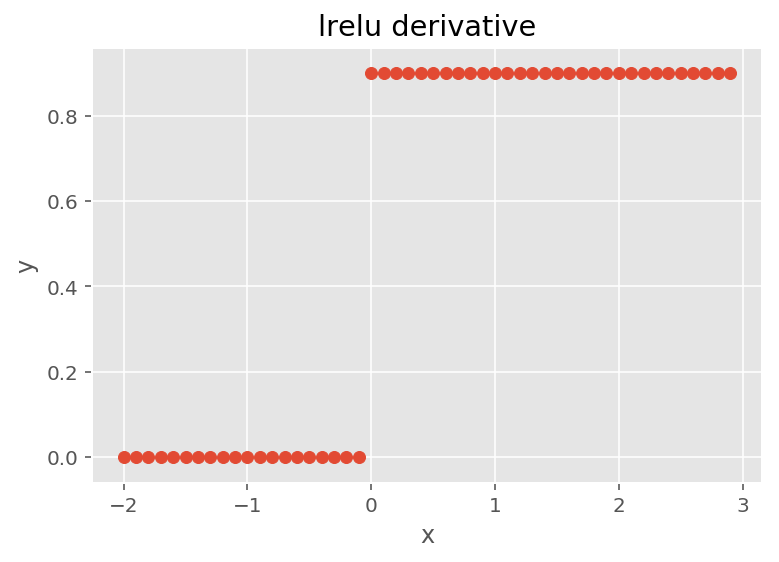

In [21]:
# Generate data points for relu
x = np.arange(-2,3,0.1)
y = lrelu(x, deriv = False)

# Generate data points for relu derivative
y_deriv = lrelu(x, deriv = True)

# Plot the data
plt.scatter(x, y)
plt.title('lrelu')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(x, y_deriv)
plt.title('lrelu derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Initialize learning parameters
**Exercise:** In the following cell code a function that returns a tensor of size n with random parameters that belong to any random data distribution.  <br>
![alt text](https://www.spcforexcel.com/files/images/nd.png)

In [22]:
def initialize_weights(x):
    """
    Function to initialize learning parameters
    :param x: tensor that contains the features of the dataset
    : return: return a tensor of size n
    """
    return np.random.rand(x.shape[1], 1)
# Test
vec = np.array([[1,2,3],[2,3,4],[5,6,7]])
print(initialize_weights(vec))

[[ 0.07765242]
 [ 0.52577304]
 [ 0.57307219]]


### Hypothesis 
**Exercise:** Implement the compute_hypothesis function
<br>

### Hypothesis in logistic regression using sigmoid function 
![alt text](https://moreintelligent.files.wordpress.com/2011/12/nnactivationf.jpg)


In [24]:
def compute_hypothesis(features, weights, activation_function = 'sigmoid'):
    '''
    Compute the hypothesis using an activation function
    :param features: input tensor that contains the features  
    :param weights: input tensor that contains the learning parameters
    :param activation_function: string parameter that controls which act. function to use
    : return: a tensor that contains the linear combination of features and weights
    '''
    if activation_function == 'sigmoid':
        return sigmoid(np.dot(features, weights))
    elif activation_function == 'relu':
        return relu(np.dot(features, weights))
    elif activation_function == 'tanh':
        return tanh(np.dot(features, weights))

#Unit test
x = np.array([-4,-3,0,4,5,6]).reshape(-1,1)
w = np.array([1]).reshape(1,1)
print(compute_hypothesis(x, w, 'sigmoid'))

[[ 0.01798621]
 [ 0.04742587]
 [ 0.5       ]
 [ 0.98201379]
 [ 0.99330715]
 [ 0.99752738]]


### Cost function
**Exercise:** Implement the cost_function function
![alt text](http://ufldl.stanford.edu/wiki/images/math/5/4/9/5491271f19161f8ea6a6b2a82c83fc3a.png)
![alt text](https://cognitree.com/wp/wp-content/uploads/2016/07/logistic-regression-5-300x292.png)

In [34]:
def cost_function(hypothesis, labels, deriv = False):
    '''
    Compute the hypothesis using an activation function
    :param features: input tensor that contains the features  
    :param weights: input tensor that contains the learning parameters
    : return: a tensor that contains the linear combination of features and weights
    '''
    m = labels.shape[0]
    # Cross entropy loss
    cost = (1/m)*np.sum(-labels*np.log(hypothesis) - (1-labels)*np.log(1-hypothesis))
    if deriv:
        ## Only when we are working with the sigmoid fuction in the 
        ## hypothesis
        cost_deriv = (1/m)*np.sum(np.dot((hypothesis-labels).T, x))
        return cost, cost_deriv
    else:
        return cost

# Unit test
hyp = np.array([0.9,0.2,0.93,0.1]).reshape(-1, 1)
lab = np.array([1,0,1,1]).reshape(-1, 1)
print(cost_function(hyp, lab, deriv = True))

ValueError: shapes (1,4) and (6,1) not aligned: 4 (dim 1) != 6 (dim 0)

### Dataset
Let's generate a dataset

In [30]:
data_x = np.array([[0,0],[0,1],[1,0],[1,1]])
data_y = np.array([0,1,1,1]).reshape(-1, 1)

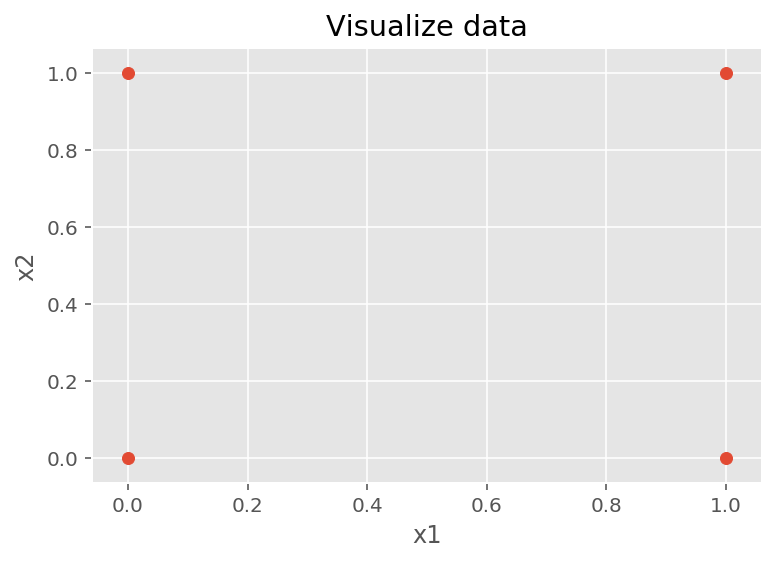

In [31]:
plt.scatter(data_x[:,0], data_x[:,1])
plt.title('Visualize data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Hyperparameters
**Excercise:** Fill the next cell with your hyperparameters 

In [32]:
# Hyperparamters 
epochs = 100
learning_rate = 0.1 

### Learning algorithm 
**Excercise:** In this section we will implement the BGD algorithm.  

In [79]:
# Support variables  
cost_history = []

# Initialize weights
weights = initialize_weights(x)

# Iterate "epochs" times
for e in range(epochs):
    # Compute the hypothesis 
    hyp = compute_hypothesis(data_x, weights, activation_function='sigmoid')
    # Compute the cost function
    cost, cost_deriv = cost_function(hyp, data_y, deriv = True)
    cost_history.append(cost)
    # Gradient descent 
    weights = weights - learning_rate*cost_deriv

    # learning rate decay
    if e%100==0:
        learning_rate = learning_rate/2
    
    # Print some output 
    print(cost)

0.422838896565
0.4162949274
0.413170128109
0.410124564708
0.407155377233
0.404259833321
0.401435321763
0.398679346396
0.395989520323
0.393363560436
0.390799282233
0.388294594918
0.385847496752
0.383456070666
0.381118480097
0.378832965058
0.376597838411
0.37441148234
0.372272345016
0.370178937435
0.368129830425
0.366123651818
0.364159083759
0.362234860165
0.360349764318
0.358502626579
0.356692322225
0.354917769392
0.353177927136
0.351471793577
0.349798404156
0.348156829966
0.346546176174
0.344965580524
0.343414211912
0.341891269034
0.340395979098
0.338927596604
0.337485402182
0.336068701486
0.334676824144
0.333309122752
0.33196497193
0.330643767408
0.329344925165
0.328067880605
0.326812087774
0.32557701861
0.324362162231
0.323167024258
0.32199112616
0.320834004639
0.31969521104
0.318574310783
0.317470882825
0.316384519147
0.31531482426
0.314261414733
0.313223918748
0.312201975663
0.311195235607
0.31020335908
0.309226016582
0.308262888247
0.307313663498
0.306378040719
0.305455726934
0.30

0.242222003028
0.242221530717
0.242221058411
0.242220586113
0.242220113821
0.242219641535
0.242219169256
0.242218696984
0.242218224718
0.242217752458
0.242217280206
0.242216807959
0.24221633572
0.242215863487


### Plot epochs vs cost
It is always useful to visualize if the algorithm is learning. 

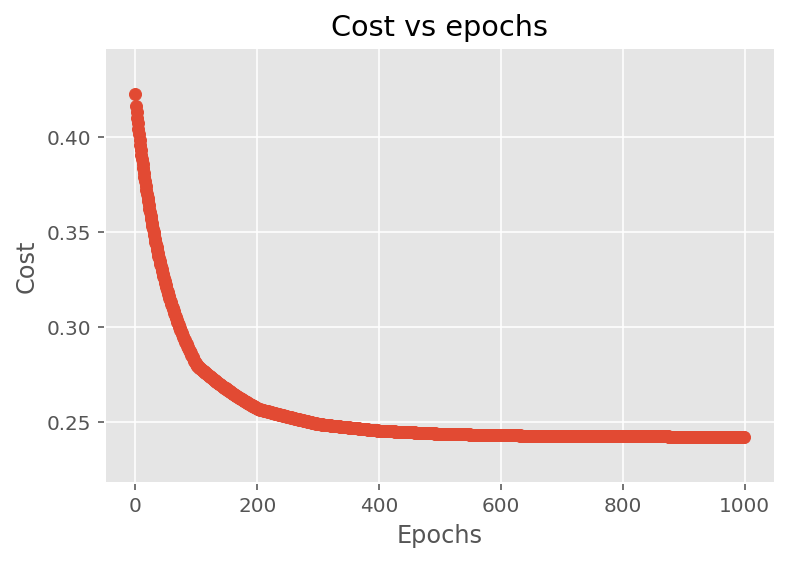

In [80]:
plt.scatter([each for each in range(len(cost_history))], cost_history)
plt.title("Cost vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

### Take a look at the outputs 
#### Logits 
Let's print the outputs of our model <br>
**Exercise:** Print the linear combination of the model using the learning parameters and the features. 

In [82]:
print(np.dot(data_x, weights))

[[ 0.        ]
 [ 2.01334119]
 [ 1.96034783]
 [ 3.97368901]]


#### Fixed outputs
Let's print the outputs of our model <br>
**Exercise:** Use the activation function chosen for your cost function to see the outputs. 

In [86]:
def outputs(logits):
    """
    Output of the model after passing throught the activation function
    :param logits: a tensor with the logits 
    : return: the output of the model with the activation function
    """
    return None
# Test
print(outputs(np.dot(data_x, weights)))

[0, 1, 1, 1]
